Dataset link

In [ ]:
ls

In [ ]:
cd /content/drive/MyDrive/IBM PROJECT

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/test_set/
   creating: Dataset/test_set/forest/
  inflating: Dataset/test_set/forest/_101542074_gettyimages_956391468.jpg  
  inflating: Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/test_set/forest/1_chimp.jpg  
  inflating: Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/test_set/forest/146019.jpg  
  i

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=180,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/Dataset/train_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')
test = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/Dataset/test_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Model Building:

import model building libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten
import warnings
warnings.filterwarnings('ignore')

Initializing the Model

Adding Convolutional Layer

Adding Dense Layers

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
____________________________________________

Configuring The Learning Process

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','mse'])

Training the Model

In [ ]:
y = model.fit_generator(train,steps_per_epoch=14,epochs=15,validation_data=test,validation_steps=4)


Epoch 1/15
14/14 [==============================] - 24s 2s/step - loss: 3.1720 - accuracy: 0.6032 - mse: 0.3361 - val_loss: 0.3162 - val_accuracy: 0.8512 - val_mse: 0.1027
Epoch 2/15
14/14 [==============================] - 20s 1s/step - loss: 0.4173 - accuracy: 0.7844 - mse: 0.1395 - val_loss: 0.2734 - val_accuracy: 0.8512 - val_mse: 0.0937
Epoch 3/15
14/14 [==============================] - 21s 1s/step - loss: 0.2720 - accuracy: 0.8739 - mse: 0.0865 - val_loss: 0.1265 - val_accuracy: 0.9669 - val_mse: 0.0358
Epoch 4/15
14/14 [==============================] - 20s 1s/step - loss: 0.2030 - accuracy: 0.9128 - mse: 0.0630 - val_loss: 0.0851 - val_accuracy: 0.9752 - val_mse: 0.0238
Epoch 5/15
14/14 [==============================] - 21s 2s/step - loss: 0.1813 - accuracy: 0.9197 - mse: 0.0555 - val_loss: 0.0773 - val_accuracy: 0.9835 - val_mse: 0.0209
Epoch 6/15
14/14 [==============================] - 22s 2s/step - loss: 0.1876 - accuracy: 0.9128 - mse: 0.0615 - val_loss: 0.0866 - val_acc

Save the Model

In [ ]:
model.save('ffd_model.h5')

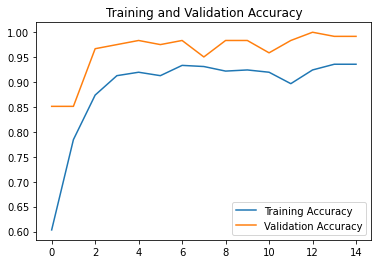

In [ ]:
import matplotlib.pyplot as plt
epochs = range(0,15)
plt.plot(epochs, y.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, y.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Predictions

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array
model = load_model('/content/drive/MyDrive/IBM PROJECT/ffd_model.h5')
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("FOREST FIRE DETECTED! SMS SENT!" if pred==[[1.]] else "NO FOREST FIRE DETECTED"))

1/1 [==============================] - 0s 112ms/step
NO FOREST FIRE DETECTED


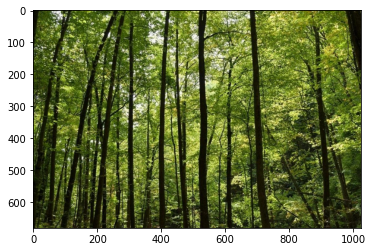

In [ ]:
prediction(r'/content/drive/MyDrive/IBM PROJECT/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg')

1/1 [==============================] - 0s 29ms/step
FOREST FIRE DETECTED! SMS SENT!


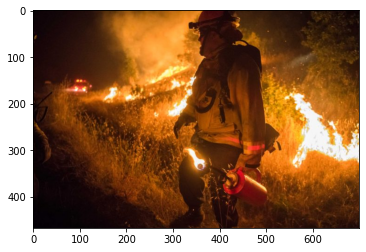

In [ ]:
prediction(r'/content/drive/MyDrive/IBM PROJECT/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')

1/1 [==============================] - 0s 27ms/step
NO FOREST FIRE DETECTED


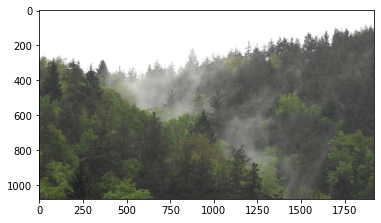

In [ ]:
prediction(r'/content/drive/MyDrive/IBM PROJECT/Dataset/train_set/forest/with_fire (1).png')